# Демонстрация Работы с ноутбуком на языке Julia

## Интегрирование методом трапеций

Функция
$$\int_{a}^{b}{\exp(\sin^3(t))dt}\,,$$
где $a = 0$, $b = 2\pi$.

In [6]:
import NumericalIntegration

function quad_trap(f::Function, a::Float64, b::Float64, N::Int)::Float64
    h = (b - a) / N
    ∫fdx = h * (f(a) + f(b)) / 2

    for k ∈ 1:N-1
        xk = (b - a) * k / N + a
        ∫fdx = ∫fdx + h * f(xk)
    end

    return ∫fdx
end

f(x) = exp( cos(x)^3 )
∫fdx = quad_trap(f, 0.0, 2π, 10000);
@info("N = 10000, a = 0, b = 2π, ∫fdx = $∫fdx\n\n")

for n ∈ 2:5
    error = abs(quad_trap(f, 0.0, 2π, 2^n) - ∫fdx)
    @info("N = 2ⁿ = $(2^n), a = 0, b = 2π, ∫fdx = $∫fdx, ϵ = $(error)")
end

# Сравниваем с библиотечной функцией интегрирования трапециями.
X = collect(0 : 2π / 10000 : 2π)
Y = f.(X)
NumericalIntegration.integrate(X, Y, NumericalIntegration.Trapezoidal())

┌ Info: N = 10000, a = 0, b = 2π, ∫fdx = 7.325635176988611
│ 
└ @ Main /home/sorcerer/Projects/DataScience/data-science-course/module_06/MATH&ML-10/julia_demo.ipynb:17
┌ Info: N = 2ⁿ = 4, a = 0, b = 2π, ∫fdx = 7.325635176988611, ϵ = 0.6636882628334257
└ @ Main /home/sorcerer/Projects/DataScience/data-science-course/module_06/MATH&ML-10/julia_demo.ipynb:21
┌ Info: N = 2ⁿ = 8, a = 0, b = 2π, ∫fdx = 7.325635176988611, ϵ = 0.009022586243255581
└ @ Main /home/sorcerer/Projects/DataScience/data-science-course/module_06/MATH&ML-10/julia_demo.ipynb:21
┌ Info: N = 2ⁿ = 16, a = 0, b = 2π, ∫fdx = 7.325635176988611, ϵ = 1.4024825416569797e-6
└ @ Main /home/sorcerer/Projects/DataScience/data-science-course/module_06/MATH&ML-10/julia_demo.ipynb:21
┌ Info: N = 2ⁿ = 32, a = 0, b = 2π, ∫fdx = 7.325635176988611, ϵ = 4.1744385725905886e-14
└ @ Main /home/sorcerer/Projects/DataScience/data-science-course/module_06/MATH&ML-10/julia_demo.ipynb:21


7.325635176988655

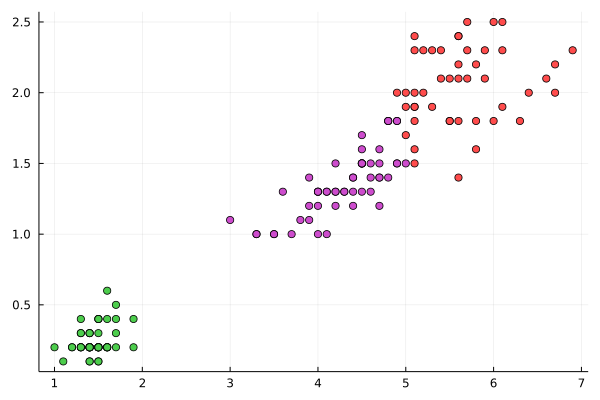

In [8]:
using RDatasets, Clustering, Plots, DataFrames
iris = dataset("datasets", "iris"); # load the data
iris = iris[:, Cols(:PetalLength, :PetalWidth)]

features = collect(Matrix(iris[:, 1:2])') # features to use for clustering
result = kmeans(features, 3); # run K-means for the 3 clusters

# plot with the point color mapped to the assigned cluster index
scatter(
        iris.PetalLength, iris.PetalWidth,
        marker_z=result.assignments,
        color=:lightrainbow,
        # markercolor=[:red,:green,:blue],
        legend=false
)